## Quantum-Enhanced Seismic Data Processing Using Variational Quantum Classifier (VQC)

we explore a hybrid classical-quantum approach for seismic data processing using a Variational Quantum Classifier (VQC). We aim to predict acoustic impedance from normalized seismic traces, leveraging quantum computing for potentially improved model performance.

## Seismic Trace and Ricker Wavelet
- Seismic Trace: A seismic trace records the reflection of seismic waves from subsurface structures. It is essential for determining subsurface properties. In our context, we have a seismic trace that has been normalized for further analysis.

- Ricker Wavelet: This is a commonly used wavelet in seismic data processing, known for its bell-shaped curve, which helps in identifying the reflections of subsurface layers.

The Ricker wavelet $W(t)$ is given by:

\begin{equation}
W(t) = \left(1 - 2\pi^2 f^2 t^2\right) \exp\left(-\pi^2 f^2 t^2\right)
\end{equation}

where $f$ is the peak frequency and $t$ is the time. The wavelet's shape helps in filtering and analyzing seismic data.

## Data Preparation and Normalization}

- {Data Normalization}

Normalization scales data to a range, making it suitable for model input. We use Min-Max normalization for our seismic trace and impedance data:

\begin{equation}
x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
\end{equation}

where $x$ is the original data, and $x_{\text{min}}$ and $x_{\text{max}}$ are the minimum and maximum values of the data, respectively.

The quantum circuit used is a Variational Quantum Circuit (VQC). It combines classical and quantum methods to improve model efficiency.

- {Angle Embedding:} Encodes classical data into quantum states. For input data $x$, the quantum state $|\psi\rangle$ is prepared as:
    \begin{equation}
    |\psi\rangle = U(x)|0\rangle
    \end{equation}

    where $U(x)$ is a unitary operation parameterized by $x$.
    
- {Entangling Layers:} Apply layers of entangling gates to create complex correlations between qubits. This is done using parameterized unitary operations to adjust the model based on the data.
    
- {Observable Measurement:} Measures the expectation value of observables (Pauli-Z operators) to infer data characteristics:
    \begin{equation}
    \langle \psi | \text{PauliZ}_i | \psi \rangle
    \end{equation}

    where $\text{PauliZ}_i$ is the Pauli-Z operator on qubit $i$.




The Enhanced Variational Quantum Classifier (VQC) combines quantum circuits with classical neural network layers to achieve improved model performance. The architecture is defined as follows:

## Variational Quantum Circuit

The quantum circuit is defined by the function `variational_circuit`, which is parameterized by input data and weights:

\begin{equation}
\text{variational\_circuit}(\text{inputs}, \text{weights}) = \left[ \text{qml.expval}(\text{qml.PauliZ}(i)) \mid i \in \{0, \ldots, n_{\text{qubits}}-1\} \right]
\end{equation}

where `qml.templates.AngleEmbedding` encodes classical data into quantum states, and `qml.templates.StronglyEntanglingLayers` applies entangling layers to introduce complex correlations between qubits.

## Quantum Node

The quantum node is defined using Pennylane's `qml.qnn.TorchLayer`:

\begin{equation}
\text{vqc\_layer} = \text{qml.qnn.TorchLayer}(\text{qml.QNode}(\text{variational\_circuit}, \text{dev}, \text{interface}="torch", \text{diff\_method}="backprop"), \text{weight\_shapes})
\end{equation}

where `weight_shapes` is a dictionary defining the shape of the weights:

\begin{equation}
\text{weight\_shapes} = \{ "weights": (5, n_{\text{qubits}}, 3) \}
\end{equation}

\subsection*{3. Quantum Neural Network Architecture}

The quantum neural network is implemented as a PyTorch module `VQCNN`:


The quantum layer (`self.vqc_layer`) is responsible for processing the input data through the variational quantum circuit, producing quantum features:

\begin{equation}
\text{output} = \text{vqc\_layer}(\text{inputs})
\end{equation}


Following the quantum layer, the classical neural network layers are applied:

- {Fully Connected Layer 1:} Transforms quantum features to a hidden layer of 32 units:
    \begin{equation}
    h_1 = \text{ReLU}(W_1 \cdot \text{output} + b_1)
    \end{equation}

    where $W_1$ and $b_1$ are the weights and biases of the first fully connected layer.
    
- {Fully Connected Layer 2:} Further processes the features to a hidden layer of 16 units:
    \begin{equation}
    h_2 = \text{ReLU}(W_2 \cdot h_1 + b_2)
    \end{equation}

    where $W_2$ and $b_2$ are the weights and biases of the second fully connected layer.
    
- {Output Layer:} Produces the final prediction:
    \begin{equation}
    \hat{y} = \text{Sigmoid}(W_3 \cdot h_2 + b_3)
    \end{equation}

    where $W_3$ and $b_3$ are the weights and biases of the output layer, and $\text{Sigmoid}$ is the activation function used for the final prediction.


## Quantum Neural Network Architecture

The network consists of:

- {Quantum Layer:} Encodes data into quantum states and applies variational circuits.
    
- {Classical Layers:} Traditional neural network layers (fully connected) for further processing of quantum outputs.
    
- {Fully Connected Layers:} Used to transform quantum features into predictions. These layers apply weights $W$ and biases $b$ to the data:
    \begin{equation}
    y = \sigma(Wx + b)
    \end{equation}
    
    where $\sigma$ is the activation function (e.g., ReLU or Sigmoid).


## Training and Optimization

The model is trained using the Mean Squared Error (MSE) loss function, which measures the difference between predicted and true values:

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation}

where $y_i$ is the true value, and $\hat{y}_i$ is the predicted value.

{Optimizer:} Adam optimizer adjusts the weights of the network based on gradients computed via backpropagation.
    
{Learning Rate Scheduler:} Adjusts the learning rate during training to ensure stable convergence.

## Evaluation Metrics

- {Mean Squared Error (MSE):} Measures the average squared difference between predicted and actual values. Lower MSE indicates better performance.

- {R-squared (R²) Score:} Indicates the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R² indicates a better fit.

    \begin{equation}
    R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
    \end{equation}

    where $\bar{y}$ is the mean of the true values.

- {Mean Absolute Error (MAE):} Measures the average magnitude of errors without considering their direction. It’s the average of the absolute differences between predicted and true values.

    \begin{equation}
    \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
    \end{equation}

- {Accuracy:} Custom metric measuring the percentage of predictions within a specific threshold of the true values.

    \begin{equation}
    \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} \times 100\%
    \end{equation}

In [14]:
import pennylane as qml
from pennylane import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from torch.optim.lr_scheduler import StepLR

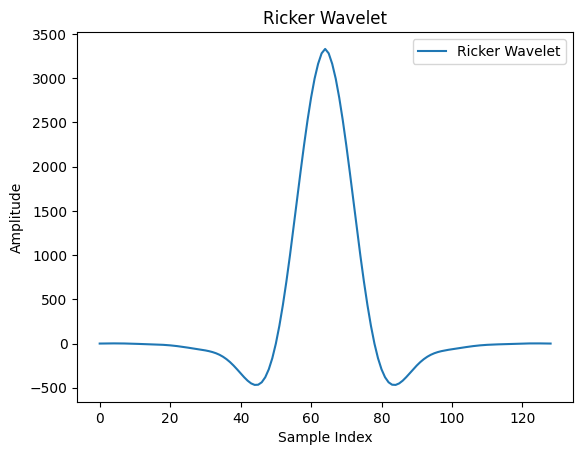

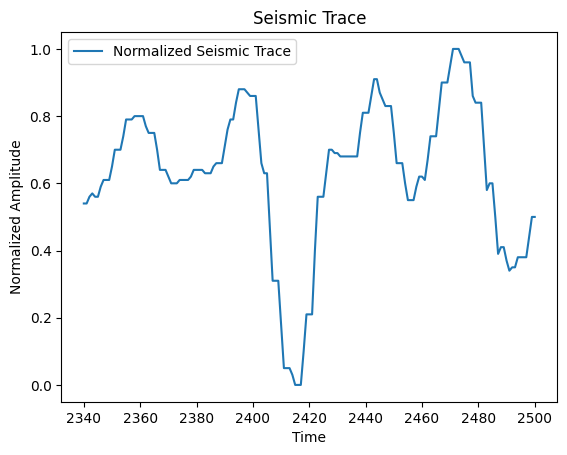

Epoch 1/200, Loss: 0.055892025247554884
Epoch 2/200, Loss: 0.05433255637233907
Epoch 3/200, Loss: 0.05410950740968639
Epoch 4/200, Loss: 0.054014714985069906
Epoch 5/200, Loss: 0.05395776820792393
Epoch 6/200, Loss: 0.05391567852348089
Epoch 7/200, Loss: 0.05388099454681982
Epoch 8/200, Loss: 0.05385092650116845
Epoch 9/200, Loss: 0.05382417650385336
Epoch 10/200, Loss: 0.05380002874881029
Epoch 11/200, Loss: 0.053778002207929436
Epoch 12/200, Loss: 0.053757865743880924
Epoch 13/200, Loss: 0.053738723043352365
Epoch 14/200, Loss: 0.05372180789709091
Epoch 15/200, Loss: 0.05370546822351488
Epoch 16/200, Loss: 0.05369033253836361
Epoch 17/200, Loss: 0.053674493323672905
Epoch 18/200, Loss: 0.05366126663813537
Epoch 19/200, Loss: 0.05364779708907008
Epoch 20/200, Loss: 0.05363518533042886
Epoch 21/200, Loss: 0.053620618768036366
Epoch 22/200, Loss: 0.05360943777486682
Epoch 23/200, Loss: 0.053597684145312414
Epoch 24/200, Loss: 0.05358588433062488
Epoch 25/200, Loss: 0.05357212674888698
E

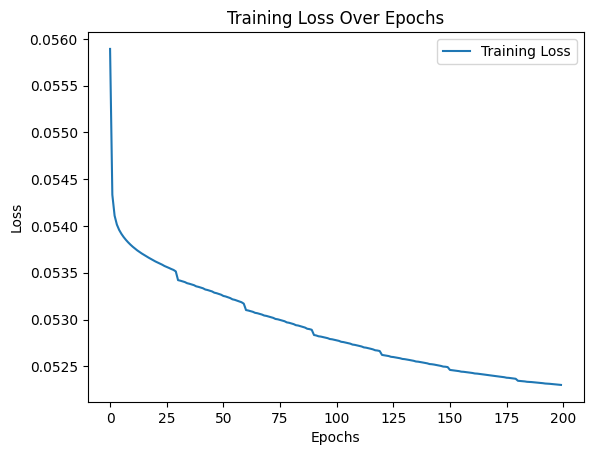

Mean Squared Error (MSE): 0.052129290997982025
R-squared (R2) Score: 0.02471851309529194
Mean Absolute Error (MAE): 0.20563481748104095
Accuracy (within threshold 0.05): 8.07%


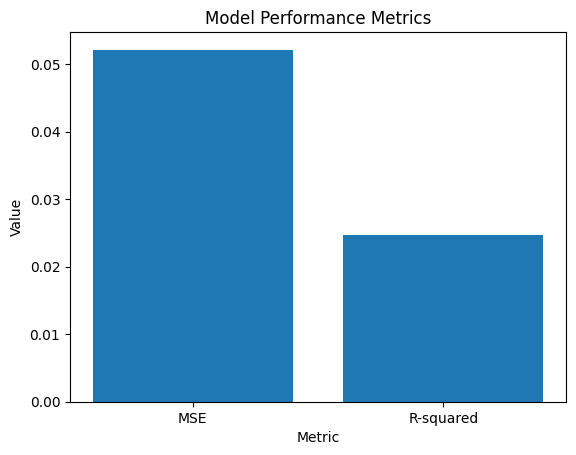

In [13]:

source_statistical = np.genfromtxt('statistical_source_wavelet.txt', delimiter='\t')
ricker_wavelet = source_statistical[:, 1]

# Plot the Ricker wavelet
plt.figure()
plt.plot(ricker_wavelet, label='Ricker Wavelet')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Ricker Wavelet')
plt.show()

# Data preparation
seismic_data = np.genfromtxt('seismic_trace_15_9_F-15-A.csv', delimiter=';')

time_seismic = -np.round(seismic_data[:, 0])
time_seismic, unique_indices = np.unique(time_seismic, return_index=True)
dt_seismic = time_seismic[1] - time_seismic[0]

seismic_trace = seismic_data[unique_indices, 1]
Ip_trace = seismic_data[unique_indices, 2]

start_time = 2340.0
end_time = 2500.0

seismic_trace_cropped = seismic_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
Ip_trace_cropped = Ip_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
time_cropped = time_seismic[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]

# Data normalization
scaler_seismic = MinMaxScaler()
seismic_trace_cropped_normalized = scaler_seismic.fit_transform(seismic_trace_cropped.reshape(-1, 1)).flatten()

scaler_ip = MinMaxScaler()
Ip_trace_cropped_normalized = scaler_ip.fit_transform(Ip_trace_cropped.reshape(-1, 1)).flatten()

# Plot the normalized seismic trace
plt.figure()
plt.plot(time_cropped, seismic_trace_cropped_normalized, label='Normalized Seismic Trace')
plt.xlabel('Time')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.title('Seismic Trace')
plt.show()

# Quantum device setup
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Enhanced Variational Quantum Classifier
def variational_circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Define quantum node
weight_shapes = {"weights": (5, n_qubits, 3)}
vqc_layer = qml.qnn.TorchLayer(qml.QNode(variational_circuit, dev, interface="torch", diff_method="backprop"), weight_shapes)

# Define the quantum neural network with VQC
class VQCNN(torch.nn.Module):
    def __init__(self):
        super(VQCNN, self).__init__()
        self.vqc_layer = vqc_layer
        self.fc1 = torch.nn.Linear(n_qubits, 32)
        self.fc2 = torch.nn.Linear(32, 16)
        self.fc3 = torch.nn.Linear(16, 1)

    def forward(self, x):
        x = self.vqc_layer(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Prepare data for PyTorch
seismic_data_tensor = torch.tensor(seismic_trace_cropped_normalized, dtype=torch.float32).unsqueeze(1)
Ip_data_tensor = torch.tensor(Ip_trace_cropped_normalized, dtype=torch.float32).unsqueeze(1)

dataset = TensorDataset(seismic_data_tensor, Ip_data_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)  # Set shuffle to False

# Model, loss function, and optimizer
model = VQCNN()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=30, gamma=0.7)

# Training loop
num_epochs = 200
train_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in dataloader:
        seismic, impedance = batch
        optimizer.zero_grad()
        output = model(seismic)
        loss = criterion(output, impedance)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    scheduler.step()
    train_losses.append(epoch_loss / len(dataloader))
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(dataloader)}")


# Save the trained model
torch.save(model.state_dict(), 'vqc_model.pth')

# Plot the training loss
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Over Epochs')
plt.show()

# Load the trained model
model.load_state_dict(torch.load('vqc_model.pth'))
model.eval()

# Evaluate the model
with torch.no_grad():
    # Predictions
    predictions = []
    true_values = []
    for batch in dataloader:
        seismic, impedance = batch
        output = model(seismic)
        predictions.extend(output.numpy())
        true_values.extend(impedance.numpy())

    predictions = np.array(predictions).flatten()
    true_values = np.array(true_values).flatten()

    # Compute metrics
    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    mae = mean_absolute_error(true_values, predictions)

    #  accuracy metric
    threshold = 0.05
    accuracy = np.mean(np.abs(true_values - predictions) <= threshold) * 100

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2) Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Accuracy (within threshold {threshold}): {accuracy:.2f}%")

# Plot the MSE and R-squared
metrics = {'MSE': mse, 'R-squared': r2}
plt.figure()
plt.bar(metrics.keys(), metrics.values())
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance Metrics')
plt.show()
